Challenge:
    
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Performance evaulators for each test: 
TEST 1: 
TYPE 1 ERROR: 55 - 9.10%
TYPE 2 ERROR: 549 - 90.8%
SENSITIVITY: 198 - 26.5%
SPECIFICITY: 4770 - 99%
ACCURACY: 0.8916008614501076
With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076
f-Measure: 0.9404574132492114

TEST 2:
TYPE 1 ERROR: 223 - 38.3%
TYPE 2 ERROR: 359 - 61.6%
SENSITIVITY: 388 - 45.2%
SPECIFICITY: 4602 - 95.3%
ACCURACY: 0.8955491744436468
With 20% Holdout: 0.8905829596412556
Testing on Sample: 0.8955491744436468
f-Measure: 0.9405272838749235

TEST 3:
TYPE 1 ERROR: 8 - 1.06%
TYPE 2 ERROR: 741 - 98.9%
SENSITIVITY: 6 - 99.19% 
SPECIFICITY: 4817 - 99.8% 
ACCURACY: 0.8655778894472361
With 20% Holdout: 0.852914798206278
Testing on Sample: 0.8655778894472361
f-Measure: 0.9278628527400558

TEST 4:
TYPE 1 ERROR: 1 - 0.13% 
TYPE 2 ERROR: 738 - 99.8% 
SENSITIVITY: 9 - 99.19% 
SPECIFICITY: 4824 - 99.8%
ACCURACY: 0.8673725771715721
With 20% Holdout: 0.8582959641255605
Testing on Sample: 0.8673725771715721
f-Measure: 0.9288533744103206

TEST 5:
TYPE 1 ERROR: 11 - 2.04%
TYPE 2 ERROR: 528 - 97.8% 
SENSITIVITY: 219 - 29.3% 
SPECIFICITY: 4814 - 99.77%
ACCURACY: 0.9032663316582915
With 20% Holdout: 0.8932735426008969
Testing on Sample: 0.9032663316582915
f-Measure: 0.9469853447427953

Which seem to perform the best? Why?
Test 5, was the best performing model. The key factors it has a accuracy of 90.3%, low false positive (type I error) of 2.04%. The specificity is very high, means that the model does a very good job at negatives correctly identified. Since the classification accuracies are close all within 2% points. It is recommended to calculate the f-measure from the recall (TP/TP + FN) and precision (TP/TP + FP). The f-measure gives us a deeper level of understanding. The closer the f-measure to 1 represents the best value or best metric to determine the classification model. When the f-measure was calculated test 5 showed a calculation of 0.9469853447427953. Which was the closest of all metrics for all tests to 1. 

Which features seemed to be most impactful to performance?
The features most impactful for performance were false positive (type I error) and accuracy. As stated above, if those values are too close then it is important to calculate the f-measure. 


    

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats
import scipy.stats as stats

%matplotlib inline
plt.style.use('seaborn-white')

In [22]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']


In [23]:
sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


TEST 1: with the following keywords from the Thinkful example. 
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

In [24]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [25]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [26]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

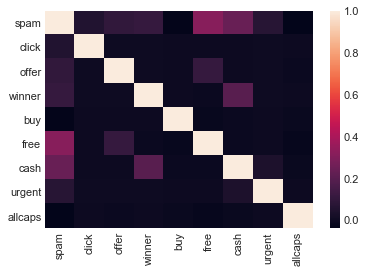

In [27]:
sns.heatmap(sms_raw.corr())

In [28]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [29]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [30]:
(604/5572)*100

10.839913854989232

In [31]:
(5572-604)

4968

In [32]:
(4968/5572)*100

89.16008614501077

Success Rate - 89.16008614501077

Determines how close we were to predicting the model. 

In [96]:
(198)/(549+198) # True positive rate


0.26506024096385544

In [99]:
import math

In [101]:
math.sqrt((198/549+55)*(198/55+198))


105.64425302268604

In [102]:
math.sqrt((198/549+55)*(4770/4770+55))

55.67941020980265

g-mean1 = 105.64425302268604
g-mean2 = 55.67941020980265


In [106]:
#Recall 
recall = (4770)/(4770 + 549)

In [107]:
#Precision 
prec = (4770)/(4770 + 55)

In [108]:
#F-measure 
(2*recall*prec)/(recall + prec)

0.9404574132492114

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

In [91]:
(4770 + 198) / (4770+55+549+198)


0.8916008614501076

TYPE 1 ERROR: 55 - 9.10%

TYPE 2 ERROR: 549 - 90.8%

SENSITIVITY: 198 - 27%

SPECIFICITY: 4770 - 99% 


False Positive: is an error when the model has identified something as spam when it actually is not. Is the value of 55. 
False Negative: is an error when the model misidentifies something as spam when it is. Is the value of 549. 

549 + 55 = 604 
(549/604) * 100 = 90.8% 
Meaning that 90.8% of error comes from the model misidentifying somthing not as spam when it actually is. 

(55/604) * 100 = 9.10 %
Meaning that 9.10% of error comes from the model identifying something as spam when it is not. 

Sensitivity:
is the percentage of positives correctly identified, in our case 198/747 or 27%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

Specificity:
is just the opposite, the percentage of negatives correctly identified, 4770/4825 or 99%.




In [34]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


(0.884304932735426/0.8916008614501076) * 100 = 99.18170461356269%

There is a very small difference between holdout and the testing sample. This is a good sign for our model. 

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

Returns a set of accuracy scores on our model. If our model is overfitting at a variable amount, those scores will fluctuate. Instead, ours are relatively consistent.

TEST 2

keywords = ['tried', 'call', 'date', 'valued', 'send', 'free', 'want']

In [36]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [37]:
keywords = ['tried', 'call', 'date', 'valued', 'send', 'free', 'want']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [38]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [39]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

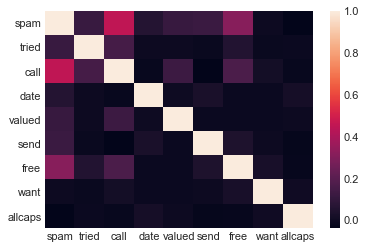

In [40]:
sns.heatmap(sms_raw.corr())

In [41]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [42]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 582


(5014/5572)*100 = 89.98564249820531



In [92]:
(4602 + 388)/(4602 + 223 + 359 + 388)

0.8955491744436468

In [110]:
recall2 = (4602)/(4602 + 359)
prec2 = (4602)/(4602 + 223)

In [111]:
#F-Measure 
(2*recall2*prec2)/(recall2 + prec2)

0.9405272838749235

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4602,  223],
       [ 359,  388]], dtype=int64)

TYPE 1 ERROR: 223 - 38.3%
TYPE 2 ERROR: 359 - 61.6%
SENSITIVITY: 388 - 45.2%
SPECIFICITY: 4602 - 95.3%


False Positive: is an error when the model has identified something as spam when it actually is not. Is the value of 223. 
False Negative: is an error when the model misidentifies something as spam when it is. Is the value of 359. 

223 + 359 = 582 
(359/582) * 100 = 61.6%
Meaning that 61.6% of error comes from the model misidentifying somthing not as spam when it actually is. 

(223/582) * 100 = 38.3%
Meaning that 38.3% of error comes from the model identifying something as spam when it is not. 

Sensitivity:
is the percentage of positives correctly identified, in our case 388/747 or 45.2%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

Specificity:
is just the opposite, the percentage of negatives correctly identified, 4602/4825 or 95.3%

In [45]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8905829596412556
Testing on Sample: 0.8955491744436468


In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.87634409, 0.89605735, 0.90860215, 0.87455197, 0.89426523,
       0.90843806, 0.89048474, 0.90107914, 0.89028777, 0.9118705 ])

Test 2 - shows slightly more flucation within the cross validation scores. Indicating we may have overfitted our model. 

TEST 3

keywords: ['real', 'few', 'a', 'you', 'sorry', 'congrats', 'laid']

In [47]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw3 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw3.columns = ['spam', 'message']

In [48]:
keywords = ['real', 'few', 'a', 'you', 'sorry', 'congrats', 'laid']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw3[str(key)] = sms_raw3.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [49]:
sms_raw3['allcaps'] = sms_raw3.message.str.isupper()

In [50]:
sms_raw3['spam'] = (sms_raw3['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

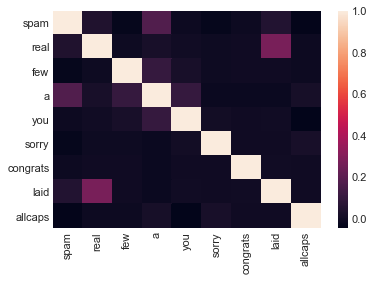

In [51]:
sns.heatmap(sms_raw3.corr())

In [52]:
data = sms_raw3[keywords + ['allcaps']]
target = sms_raw3['spam']

In [53]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 749


In [54]:
5572-749

4823

(4823/5572)*100 = 86.55778894472361

TEST 3: out of the previous 2 models has the lowest percentage of mislabeled points. 

In [103]:
(4817 + 6) / (4817 + 8 + 741 + 6)

0.8655778894472361

In [112]:
recall3 = (4817) / (4817 + 741)
prec3 = (4817) / (4817 + 8)

In [113]:
#F-Measure

(2*recall3*prec3) / (recall3 + prec3)

0.9278628527400558

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4817,    8],
       [ 741,    6]], dtype=int64)


TYPE 1 ERROR: 8 - 1.06%
TYPE 2 ERROR: 741 - 98.9%
SENSITIVITY: 6- 99.19% 
SPECIFICITY: 4817 - 99.8% 


False Positive: is an error when the model has identified something as spam when it actually is not. Is the value of 8. 
False Negative: is an error when the model misidentifies something as spam when it is. Is the value of 741. 

8 + 741 = 749
(741/749) * 100 = 98.9%
Meaning that 98.9% of error comes from the model misidentifying somthing not as spam when it actually is. Very high percentage of misses the model found. 

(8/749) * 100 = 1.06%
Meaning that 1.06% of error comes from the model identifying something as spam when it is not. The model did a great job at finding spam when it is not. 

Sensitivity:
is the percentage of positives correctly identified, in our case 741/747 or 99.19%. This shows how good we are at catching positives. Very sensitive model. 

Specificity:
is just the opposite, the percentage of negatives correctly identified, 4817/4825 = 99.8%

In [57]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.852914798206278
Testing on Sample: 0.8655778894472361


In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.86738351, 0.8655914 , 0.86200717, 0.8655914 , 0.86738351,
       0.86535009, 0.86535009, 0.86151079, 0.86690647, 0.86510791])

Test 3 - show very little flucation within the cross validation scores. Means that this is a very strong model. 

In [ ]:
TEST 4: keywords = ['baby', 'sex', 'is', 'come', 'all', 'miss', 'out']

In [59]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw4 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw4.columns = ['spam', 'message']

In [60]:
keywords = ['baby', 'sex', 'is', 'come', 'all', 'miss', 'out']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw4[str(key)] = sms_raw4.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [61]:
sms_raw4['allcaps'] = sms_raw4.message.str.isupper()

In [62]:
sms_raw4['spam'] = (sms_raw4['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

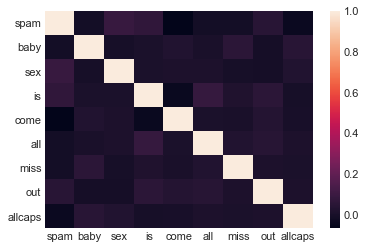

In [63]:
sns.heatmap(sms_raw4.corr())

In [66]:
data1 = sms_raw4[keywords + ['allcaps']]
target1 = sms_raw4['spam']

In [67]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 739


In [68]:
5572-739

4833

(4833/5572)* 100 = 86.7372577171572

Similar to test 3 by percentage of mislabeled points. Not as strong as test 2 or test 1. 

In [94]:
(4824 + 9) / (4824 + 1 + 738 + 9)

0.8673725771715721

In [114]:
recall4 = (4824) / (4824 + 738)
prec4 = (4824) / (4824 + 1)

In [115]:
#F-Measure

(2*recall4*prec4)/(recall4+prec4)

0.9288533744103206

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target1, y_pred)

array([[4824,    1],
       [ 738,    9]], dtype=int64)


TYPE 1 ERROR: 1 - 0.13% 
TYPE 2 ERROR: 738 - 99.8% 
SENSITIVITY: 9 - 99.19% 
SPECIFICITY: 4824 - 99.8%

False Positive: is an error when the model has identified something as spam when it actually is not. Is the value of 1. False Negative: is an error when the model misidentifies something as spam when it is. Is the value of 738.

1 + 739 = 739 (738/739) * 100 = 99.8% Meaning that 99.8% of error comes from the model misidentifying somthing not as spam when it actually is. Extremely high percentage of misses the model found.

(1/739) * 100 = 0.13% Meaning that 0.13% of error comes from the model identifying something as spam when it is not. The model did a great job at finding spam when it is not. Amazing job at fitting the model. 

Sensitivity: is the percentage of positives correctly identified, in our case 739/748 or 98.7%. This shows how good we are at catching positives. Very sensitive model.

Specificity: is just the opposite, the percentage of negatives correctly identified, 4824/4825 = 99.979%
This is the highest possible specificity without having it 100%. 

In [71]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 20% Holdout: 0.8582959641255605
Testing on Sample: 0.8673725771715721


In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data1, target1, cv=10)

array([0.8655914 , 0.8655914 , 0.8655914 , 0.8655914 , 0.86738351,
       0.86894075, 0.86535009, 0.86870504, 0.87230216, 0.86870504])

Very strong model. Very mininal flucation within in the cross validation scores. 

TEST 5: 

In [73]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw5 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw5.columns = ['spam', 'message']

In [74]:
keywords = ['kiss', 'txt', 'thing', 'in', 'your', 'claim', 'book']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw5[str(key)] = sms_raw5.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [75]:
sms_raw5['allcaps'] = sms_raw5.message.str.isupper()

In [76]:
sms_raw5['spam'] = (sms_raw5['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

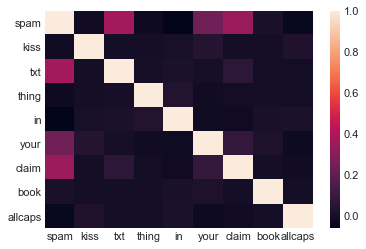

In [77]:
sns.heatmap(sms_raw5.corr())

In [79]:
sms_raw5['allcaps'] = sms_raw5.message.str.isupper()

In [80]:
data2 = sms_raw5[keywords + ['allcaps']]
target2 = sms_raw5['spam']

In [81]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 539


In [83]:
5572-539

5033

(5033/5572) * 100 = 90.32663316582915

A 90.3% mislabeled points out of a total 5572. The intial model did a great job. 

In [95]:
(4814 + 219) / (4814 + 11 + 528 + 219)

0.9032663316582915

In [116]:
recall5 = (4814) / (4814 + 528)
prec5 = (4814) / (4814 + 11)

In [119]:
#F-Measure

(2*recall5*prec5)/(recall5 + prec5)

0.9469853447427953

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred)

array([[4814,   11],
       [ 528,  219]], dtype=int64)


TYPE 1 ERROR: 11 - 2.04%
TYPE 2 ERROR: 528 - 97.8% 
SENSITIVITY: 219 - 29.3% 
SPECIFICITY: 4814 - 99.77%

False Positive: is an error when the model has identified something as spam when it actually is not. Is the value of 11. False Negative: is an error when the model misidentifies something as spam when it is. Is the value of 528.

11 + 528 = 539 (528/539) * 100 = 97.9% Meaning that 97.9% of error comes from the model misidentifying somthing not as spam when it actually is. 

(11/539) * 100 = 2.04% 
Meaning that 2.04% of error comes from the model identifying something as spam when it is not. The model did a great job at finding spam when it is not. 

Sensitivity: is the percentage of positives correctly identified, in our case 219/747 or 29.3%. This shows how good we are at catching positives. Not very sensitive model.

Specificity: is just the opposite, the percentage of negatives correctly identified, 4814/4825 = 99.77%


In [86]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.8932735426008969
Testing on Sample: 0.9032663316582915


Very close fitting model. 

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.91039427, 0.90681004, 0.90681004, 0.91577061, 0.91039427,
       0.90125673, 0.8994614 , 0.88489209, 0.89388489, 0.90107914])

Very little flucation within the cross validation scores. The cross validation scores are much higher then previous tests. 